For proper functioning of R, this commands are to be  executed. Unlike in the Python runtime where command line statements are written directly , in R system function has to be used and the commands are passed as strings.

In [0]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

Keras Package is needed to be installed.

In [0]:
install.packages('keras')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘config’, ‘reticulate’, ‘tensorflow’, ‘tfruns’



Now, to activate tensorflow backend for Keras , installation of tensorflow is requirerd. For that, Keras and its attached Tensorflow support are to be loaded into the R environment.

In [0]:
library(keras)
library(tensorflow)

To install Tensorflow,  Python Virtual Envirnoment has to be simulated within R.

In [0]:
system("sudo apt-get install python-virtualenv")

In [0]:
install_tensorflow()

The MNIST Dataset is present on Colab as well as within Keras. I am using the Keras versio of the dataset.

In [0]:
mnist <- dataset_mnist()

In [0]:
X_train <- mnist$train$x
y_train <- mnist$train$y
X_test <- mnist$test$x
y_test <- mnist$test$y

In [0]:
y_train <- sapply(y_train, function(x){ ifelse(x==7,"outlier","normal")})
y_test <- sapply(y_test, function(x){ ifelse(x==7,"outlier","normal")})

In [0]:
# Setting the plot display options
options(repr.plot.width  = 5,
        repr.plot.height = 5)

[1] "normal"

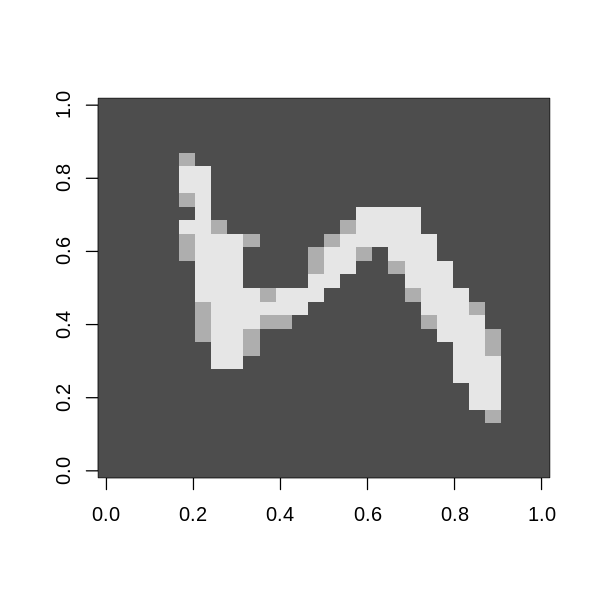

In [0]:
# A random image from the training set.
image(X_train[1,,], col=gray.colors(3))
y_train[1]

In [0]:
# Reshaping the Datatset into (number of samples , 28*28) datatset
dim(X_train) <- c(nrow(X_train), 784)
dim(X_test) <- c(nrow(X_test), 784)

# Rescaling the dataset from 0 to 1 as Convolutional Layers converge efficiently here
X_train <- X_train / 255
X_test <- X_test / 255

In [0]:
input_dim <- 784 
inner_layer_dim <- 32

Now, the AutoEncoder is defined here.

In [0]:
input_layer <- layer_input(shape=c(input_dim))
encoder <- layer_dense(units=inner_layer_dim, activation='relu')(input_layer)
decoder <- layer_dense(units=784)(encoder)
autoencoder <- keras_model(inputs=input_layer, outputs = decoder)

In [0]:
autoencoder %>% compile(optimizer='adam', 
                        loss='mean_squared_error', 
                        metrics=c('accuracy'))

#### Training

In [0]:
history <- autoencoder %>% fit(
  X_train,X_train, 
  epochs = 50, batch_size = 256, 
  validation_split=0.2
)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


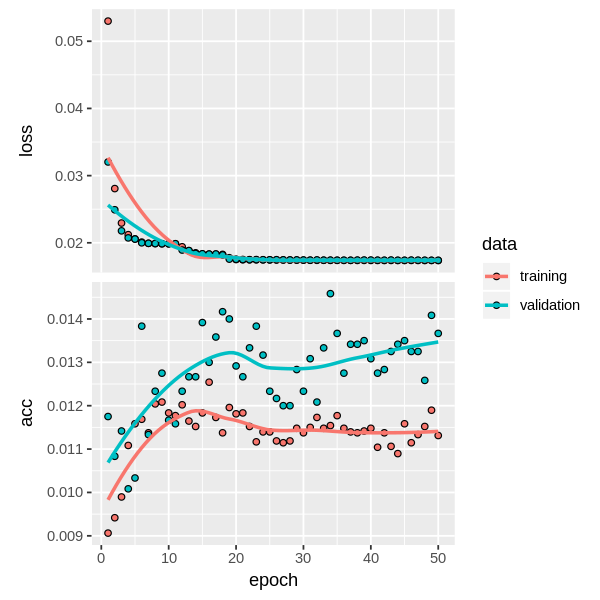

In [0]:
plot(history)

#### Prediction

In [0]:
preds <- autoencoder %>% predict(X_test)

In [0]:
squared_error <- rowSums((preds-X_test)**2)

In [0]:
mean(squared_error)

[1] 13.28231

In [0]:
eval <- data.frame(error=squared_error, class=as.factor(y_test))
library(dplyr)
eval %>% group_by(class) %>% summarise(avg_error=mean(error))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



class,avg_error
<fct>,<dbl>
normal,13.45679
outlier,11.75953


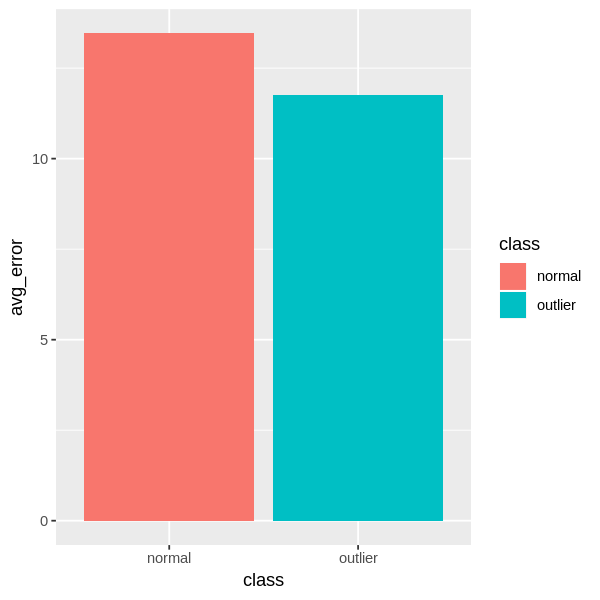

In [0]:
library(ggplot2)
eval %>% 
  group_by(class) %>% 
  summarise(avg_error=mean(error)) %>% 
  ggplot(aes(x=class,fill=class,y=avg_error))+geom_col()

In [0]:
dim(X_test) <- c(nrow(X_test),28,28)
dim(preds) <- c(nrow(preds),28,28)


[1] "outlier"

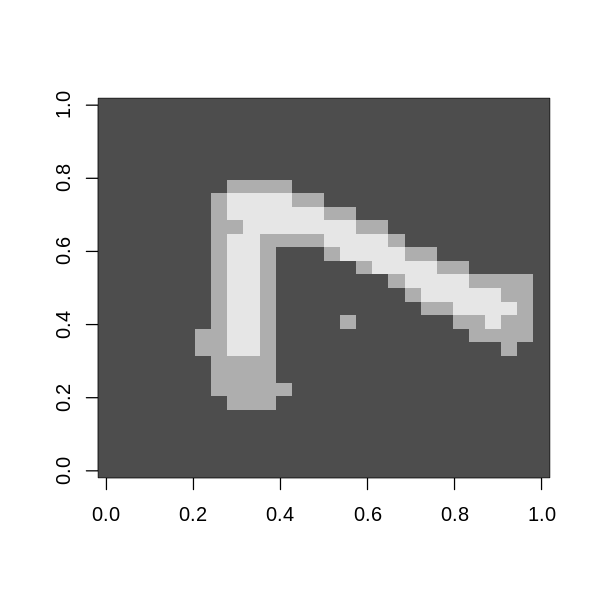

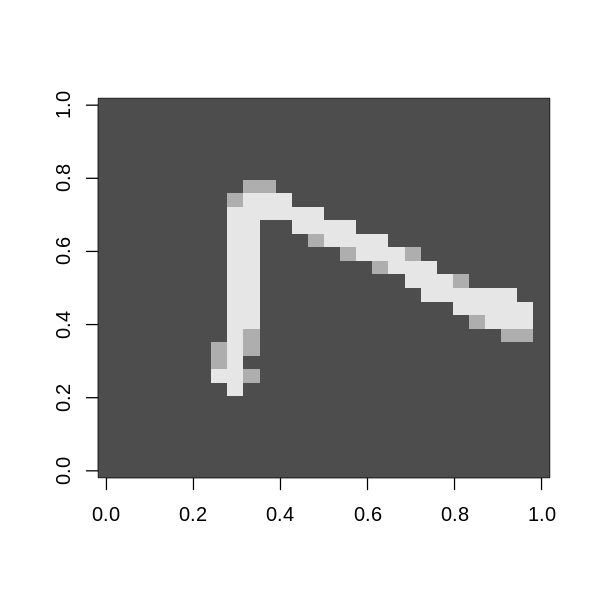

In [0]:
image(255*preds[1,,], col=gray.colors(3))
y_test[1]
image(255*X_test[1,,], col=gray.colors(3))

This shows that this auto-encoder learns the features of the images well and is able to reconstruct the image.